In [1]:
import gym
from keras.optimizers import Adam

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback
from src.downsamplers import downsample_pong

# Environment

In [3]:
# v4 disables the 25% chance of the emulator ignoring the input action and 
# repeating the last action instead.
env = gym.make('Pong-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(6)

# Agent

In [6]:
agent = DeepQAgent(env, downsample_pong,
    replay_memory_size=250000,
    optimizer=Adam(lr=1e-4)
)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<Pong-v4>>>,
    downsample=Downsampler(y=(34, 16), x=(15, 15), cut=[107, 87]),
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x7f7d89c66630>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x7f7d95546bf8>,
    image_size=(84, 84),
    render_mode='human'
)

In [7]:
res_random = agent.play(games=30)
res_random

100%|██████████| 30/30 [01:20<00:00,  2.69s/game]


array([-21., -21., -21., -21., -21., -21., -21., -21., -21., -21., -21.,
       -21., -21., -21., -21., -21., -21., -21., -21., -21., -21., -21.,
       -21., -21., -21., -21., -21., -19., -21., -21.])

In [8]:
res_random.mean()

-20.933333333333334

In [9]:
agent.observe(50000)

100%|██████████| 50000/50000 [01:04<00:00, 778.00frame/s]


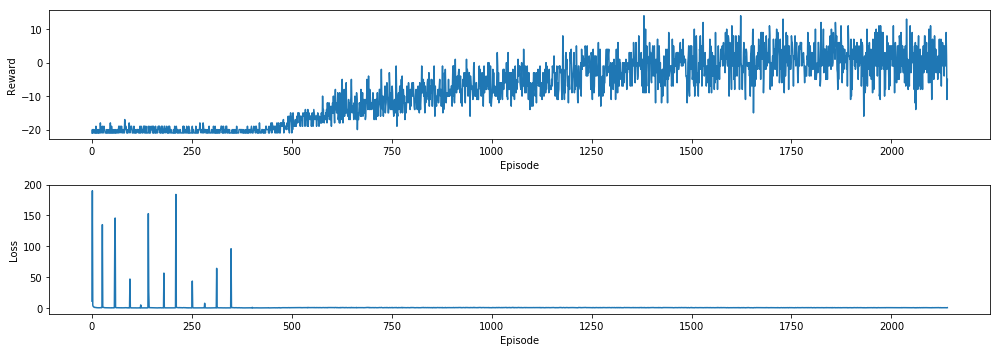

 71%|███████   | 7055663/10000000 [10:07:20<4:23:22, 186.33frame/s]

KeyboardInterrupt: 

In [10]:
callback = JupyterCallback()
agent.train(frames_to_play=10000000, callback=callback)

In [11]:
res_trained = agent.play(games=30)
res_trained


100%|██████████| 30/30 [04:41<00:00,  9.39s/game]


array([ 9.,  5.,  5.,  4.,  8., -3., 12., 10.,  4., 12.,  7.,  5.,  2.,
        7., 12., 11., 10.,  8.,  7.,  3.,  9.,  7.,  1.,  4.,  9.,  9.,
        7.,  2.,  7., 11.])

In [12]:
res_trained.mean()

6.8

In [13]:
!mkdir -p models
!mkdir -p models/dqn

In [14]:
agent.model.save_weights('./models/dqn/pong-nondeterministic.h5', overwrite=True)